# **Regression Project: Boston House Price Prediction**

# **Marks: 60**

Welcome to the project on regression. We will use the **Boston house price dataset** for this project.

-------------------------------
## **Objective**
-------------------------------

The problem at hand is to **predict the housing prices of a town or a suburb based on the features of the locality provided to us**. In the process, we need to **identify the most important features affecting the price of the house**. We need to employ techniques of data preprocessing and build a linear regression model that predicts the prices for the unseen data.

----------------------------
## **Dataset**
---------------------------

Each record in the database describes a house in Boston suburb or town. The data was drawn from the Boston Standard Metropolitan Statistical Area (SMSA) in 1970. Detailed attribute information can be found below:

Attribute Information:

- **CRIM:** Per capita crime rate by town
- **ZN:** Proportion of residential land zoned for lots over 25,000 sq.ft.
- **INDUS:** Proportion of non-retail business acres per town
- **CHAS:** Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
- **NOX:** Nitric Oxide concentration (parts per 10 million)
- **RM:** The average number of rooms per dwelling
- **AGE:** Proportion of owner-occupied units built before 1940
- **DIS:** Weighted distances to five Boston employment centers
- **RAD:** Index of accessibility to radial highways
- **TAX:** Full-value property-tax rate per 10,000 dollars
- **PTRATIO:** Pupil-teacher ratio by town
- **LSTAT:** % lower status of the population
- **MEDV:** Median value of owner-occupied homes in 1000 dollars

## **Importing the necessary libraries**

In [1]:
# Import libraries for data manipulation
import pandas as pd
import numpy as np

# Import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns


# statsmodels is a Python module that provides classes and functions for the
# estimation of many different statistical models, as well as for conducting
# statistical tests, and statistical data exploration.
# Import libraries for building linear regression model
from statsmodels.graphics.gofplots import ProbPlot
from statsmodels.formula.api import ols
import statsmodels.api as sm

# import Ordinary least squares Linear Regression library
from sklearn.linear_model import LinearRegression
# Import to Split arrays or matrices into random train and test subsets.
from sklearn.model_selection import train_test_split
# Import library for data preprocessing, transforming features by scaling each feature to a given range.
from sklearn.preprocessing import MinMaxScaler
# Import library for cross-validation
from sklearn.model_selection import  cross_val_score
# import Mean squared error regression loss library
from sklearn.metrics import mean_squared_error
#imports sklearn Utilities to load popular datasets and artificial data generators.
from sklearn import datasets


import warnings
warnings.filterwarnings("ignore")

## data access and collection

In [3]:
# read the data
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv("/content/drive/MyDrive/MIT/elective/Boston.csv") ## Complete the code

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## data preparation

In [4]:
# returns the first 5 rows
df.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


In [5]:
num_rows = df.shape[0]
num_cols = df.shape[1]
print("Number of rows:", num_rows)
print("Number of columns:", num_cols)

Number of rows: 506
Number of columns: 13


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  LSTAT    506 non-null    float64
 12  MEDV     506 non-null    float64
dtypes: float64(10), int64(3)
memory usage: 51.5 KB


In [7]:
summary_stats = df.describe(include="all")
print("Summary Statistics:")
print(summary_stats)

Summary Statistics:
             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO       LSTAT  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534   12.653063   
std    

##Observations##

The dataset has 506 rows which each correspond to a house in a Boston suburb.
there are no null values.

### Features/predictors ###

**CRIM: Per capita crime rate by town**, means the average rate of crimes committed per resident per given time frame. The mean of 3.61 is right-skewed as the median shows that half the towns have a crime rate of 0.25 or less. The maximum crime rate of 88.97 is much higher than the minimum of 0.00632, contributing to a high variance of 8.60 and a right-skewed distribution.


**ZN: Proportion of residential land zoned for lots over 25,000 sq.ft** : a majority of towns have no large lot zoning as the median is 0. Upper quartile towns have up to 12.5 % land that is zoned for large plots. a few towns are fully zoned for large plots (max 100%).

**INDUS: Proportion of non-retail business acres per town.** The average of 11.14% vs median of 9.69% suggest a central tendency near 10%, so many towns have a moderate non retail business acreage. But the range, from a maximum of 27.7 % and a minimum of 0.46% shows that some towns are predominantly residential while others have significant industrial or non-retail business presence.

**CHAS: Charles River dummy variable** (= 1 if tract bounds river; 0 otherwise)
This is a boolean variable to indicate that a house is in a town bordering the Charles river in Boston. we see that only 6.92% of towns border the river and that 93.08 don't bound the Charles river. So we can conclude that the 7% have probably higher property values as river bound areas tend to be more expensive.


**NOX: Nitric Oxide concentration (parts per 10 million)**. air pollution  serves as a quality indicator for each town of and an indirect marker of industrialization and urbanization. The values range between 0.385 (cleaner, less industrialized), and 0.871 (poor air quality) with a median of 0.538 and average of 0.55 and a standard deviation of 0.1159 indicating a slight right skewness indicating environmental inequality. we expect NOX to correlate with industrial activity and inversely with property values, public health and environmental quality.


AGE: Proportion of owner-occupied units built before 1940.
on average 68.87 % of houses are built before 1940, but in half the towns, 77.5 % are older than 1940. this left-skewedness means that some towns have an almost exclusively pre 1940 housing stock. there is high diversity in the housing age as the deviation is 28% with a min. of 2.9% and a max of 100%.

**RM: average Number of Rooms per house** On average the # of rooms centers around 6.28 very close to median value of 6.21 so the distribution is almost symmetric. the 0.70 standard deviation is moderate relative to the range between the minimum of 3.561 and max value of 8.78).

**DIS: Weighted distances to five Boston employment centers** : houses have a very wide range of employment center distance, between 1.12 and 12.12 miles. the average is 3.8 miles with a median of 3.21 indicating a slight right skewedness. Low DIS corresponds to urban areas while high DIS means a low density or rural suburb.


**RAD: Index of accessibility to radial highways** There is significant variability in highway access across towns ranging from median 5 to 24 miles with most towns clustering at mid range accesability level.

**TAX: Full-value property-tax rate per 10,000 dollars** property tax ranges from 1.87% to 7.11% with average of 4.08%. there is some variability as the highest 25% pay more than 6.66% and the lowest 25% pay 2.79%.

**PTRATIO: Pupil-teacher ratio by town** this is the number of students who attend a school or university divided by the number of teachers in the institution. the mean is 18.46 with a maximum of 22.0 and standard deviation of 2.16 indicating low to moderate variability. 25% of towns have a ratio < 17.4 while upper quartile towns have higher ratios.

**LSTAT: % lower status of the population** the LSTAT shows a wide range between 1.73% and 37.97% and a mean of 12.65% with standard deviation of 7.14%. 25% of towns have a percentage of lower-status populations below 6.95% while the upper quartile is 16.95%.

### target variable ###
MEDV: Median value of owner-occupied homes in 1000 dollars (1970 values)
house value has a wide range from \$5000 to \$50000 with median of \$21200 and mean of \$22533. the \$50k max value indicates this dataset was capped to reduce outliers.



##Sanity checks##



In [8]:
df.isnull().sum()

,0
CRIM,0
ZN,0
INDUS,0
CHAS,0
NOX,0
RM,0
AGE,0
DIS,0
RAD,0
TAX,0


There are no null values.
However we detected that the MEDV target variable is capped at \$50000


## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions:**

1. What does the distribution of 'MEDV' look like?
2. What can we infer form the correlation heatmap? Is there correlation between the dependent and independent variables?
3. What are all the inferences that can be found by doing univariate analysis for different variables?
4. Do bivariate analysis to visualize the relationship between the features having significant correlations (>= 0.7 or <= -0.7)

In [10]:
## define a function for boxplots and histograms for numerical variables
## continuous variables : CRIM. ZN, INDUS, NOX, RM, AGE, DIS, TAX, PTRATIO, LSTAT and MEDV
def histogram_boxplot(feature, title, figsize=(10, 6), bins="auto"):
    """ Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (15, 10))
    bins: number of bins (default "auto")
    """
    f, (ax_plot, ax_hist) = plt.subplots(
      nrows=2,  # Number of rows of the subplot grid
      sharex=True,  # The X-axis will be shared
      gridspec_kw={"height_ratios": (.25, .75)},
      figsize=figsize
    )

    ax1 = sns.boxplot(x=feature, ax=ax_plot, showmeans=True, color='red')
    ax1.set_title(f'Box Plot of {title}')
    # Creating the subplots
    # Boxplot will be created and the mean value of the column will be indicated using some symbol

    # For histogram
    ax2 = sns.histplot(x=feature, kde=True, ax=ax_hist, bins=bins)
    ax2.axvline(np.mean(feature), color='g', linestyle='--')      # Add mean to the histogram
    ax2.axvline(np.median(feature), color='black', linestyle='-') # Add median to the histogram
    plt.ylabel('Frequency') # y axis name
    ax2.set_title(f'Histogram of {title}')
    plt.show()



In [20]:
#define a function for countplots on categorical data
## 	Categorical Variables: CHAS and RAD
def bar_perc(data, z, title):
    total = len(data[z]) # Length of the column
    plt.figure(figsize = (15, 5))

    # Convert ratings column to a categorical data type
    data[z] = data[z].astype('category')

    ax = sns.countplot(x=z, data=data, palette='Paired', order=data[z].value_counts().index)
    ax.set_title(f'count Plot of {title}')

    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height() / total) # Percentage of each class
        x = p.get_x() + p.get_width() / 2 - 0.05                    # Width of the plot
        y = p.get_y() + p.get_height()                              # Height of the plot
        ax.annotate(percentage, (x, y), size = 12)                  # Annotate the percentage

    plt.show()                                                      # Display the plot

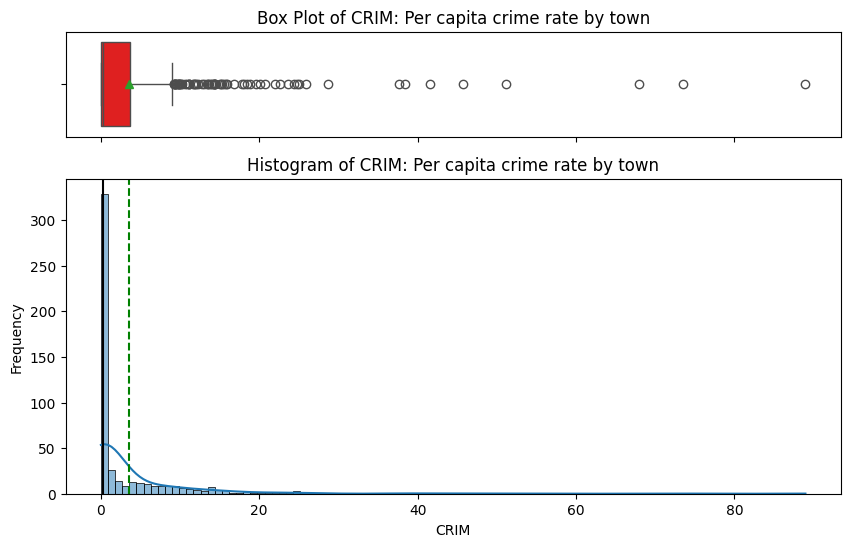

In [24]:
histogram_boxplot(df.CRIM, 'CRIM: Per capita crime rate by town')

CRIM: Per capita crime rate by town, means the average rate of crimes committed per resident per given time frame. The mean of 3.61 is right-skewed as the median shows that half the towns have a crime rate of 0.25 or less. The maximum crime rate of 88.97 is much higher than the minimum of 0.00632, contributing to a high variance of 8.60 and a right-skewed distribution.

from the histogram we see that the majority of towns have very low crime rates as seen by sharp peak near minimum of 0.00632, but there is a long right tail, so some towns have a much higher crime rate.

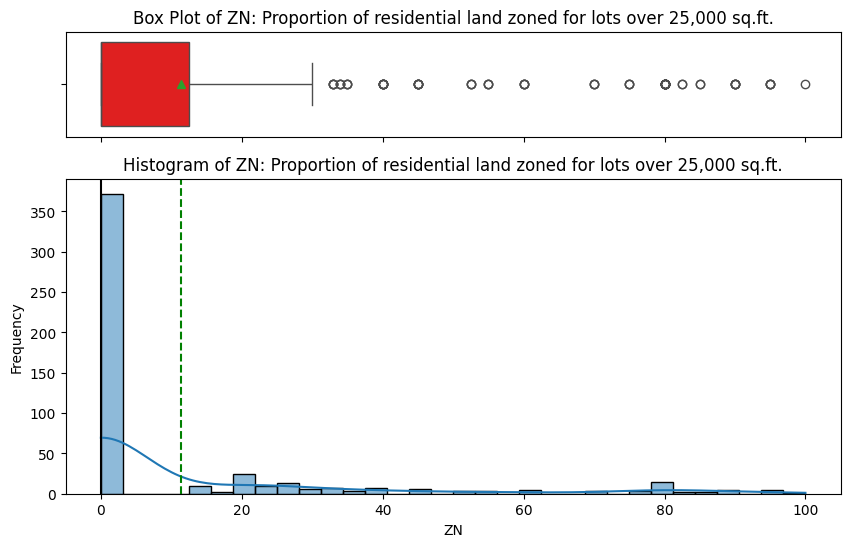

In [25]:
histogram_boxplot(df.ZN, 'ZN: Proportion of residential land zoned for lots over 25,000 sq.ft.')


a majority of towns have no large lot zoning as the median is 0. Upper quartile towns have up to 12.5 % land that is zoned for large plots. a few towns are fully zoned for large plots (max 100%). we can deduce that the lower ZN the more urbanised, the higher the more suburban.

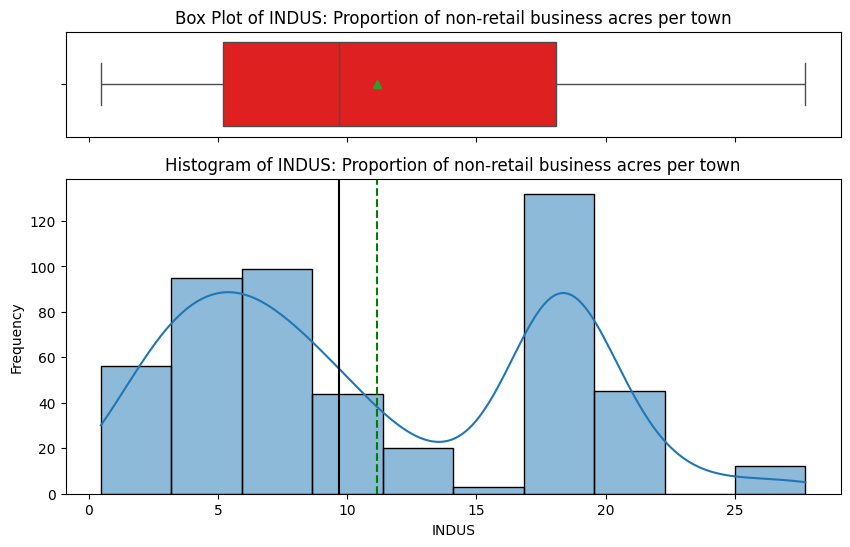

In [26]:
histogram_boxplot(df.INDUS, 'INDUS: Proportion of non-retail business acres per town')


The average of 11.14% vs median of 9.69% suggest a central tendency near 10%, so many towns have a moderate non retail business acreage. But the range, from a maximum of 27.7 % and a minimum of 0.46% shows that some towns are predominantly residential while others have significant industrial or non-retail business presence.

From the plot we see a bimodal distribution. a first peak around low INDUS values and a second peak around 20%


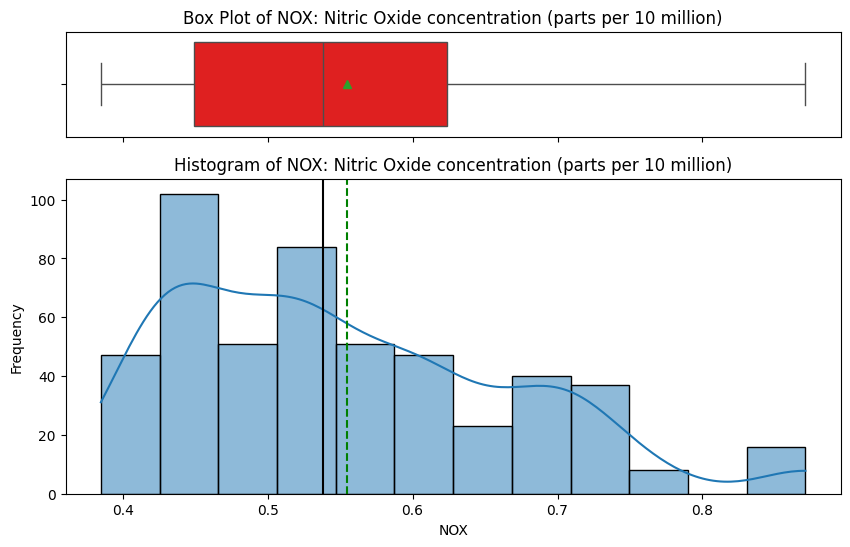

In [27]:
histogram_boxplot(df.NOX, 'NOX: Nitric Oxide concentration (parts per 10 million)')


air pollution serves as a quality indicator for each town of and an indirect marker of industrialization and urbanization. The values range between 0.385 (cleaner, less industrialized), and 0.871 (poor air quality) with a median of 0.538 and average of 0.55 and a standard deviation of 0.1159 indicating a slight right skewness indicating environmental inequality. we expect NOX to correlate with industrial activity and inversely with property values, public health and environmental quality.

The plot shows clustering of NOX values and confirms the a right skew meaning that most areas have low NOX values but other areas have very high values.


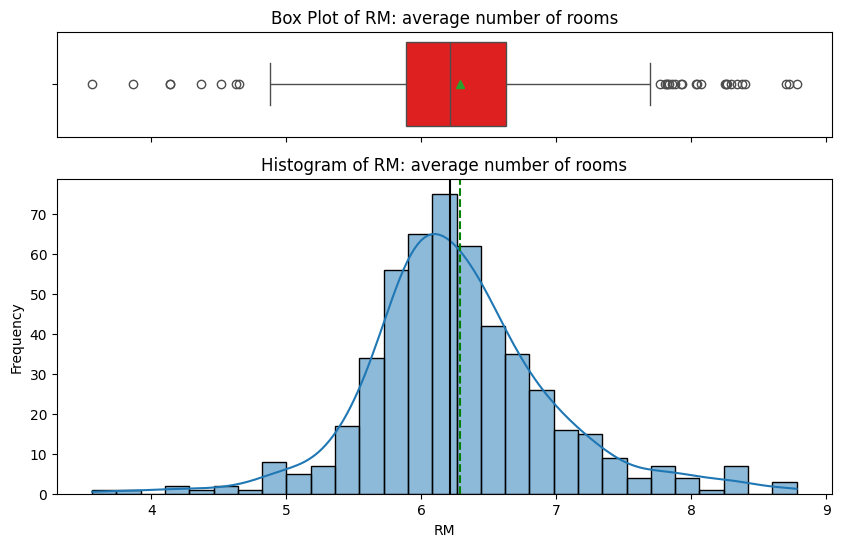

In [28]:
histogram_boxplot(df.RM, 'RM: average number of rooms')


The plot confirms the symmetrical distribution of room numbers.  

each record in this dataset represents 1 individual house, so it is suprising that there no single room dwellings, since Boston is a university town where one would expect single room studios or apartments. perhaps this changed after 1970 when this dataset was produced or smaller dwellings might not be included in the dataset.

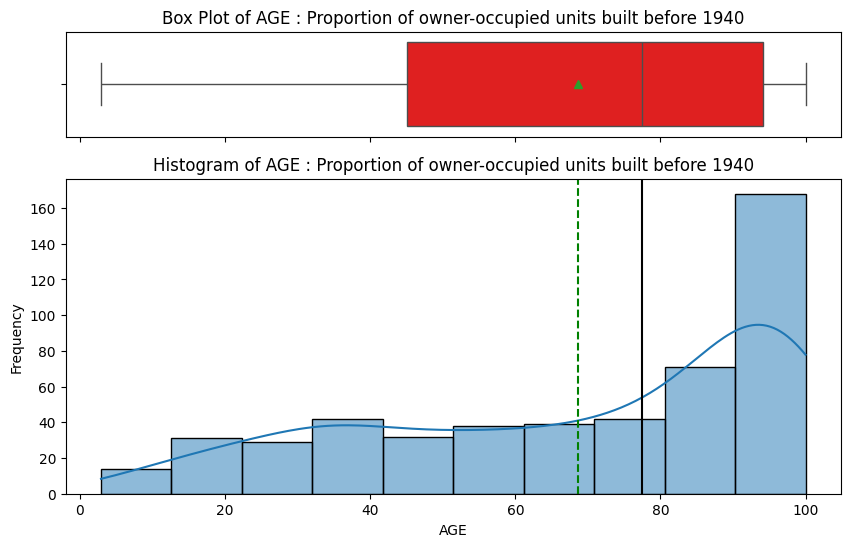

In [29]:
histogram_boxplot(df.AGE, 'AGE : Proportion of owner-occupied units built before 1940')


on average 68.87 % of houses are built before 1940, but in half the towns, 77.5 % are older than 1940. this left-skewedness means that some towns have an almost exclusively pre 1940 housing stock. there is high diversity in the housing age as the deviation is 28% with a min. of 2.9% and a max of 100%.

The plot confirms the left skew.

high AGE could correlate with MEDV value in both ways, as lack of modernization may influence value negatively while hostorical charm will influence it positively. so we will check this correlation.

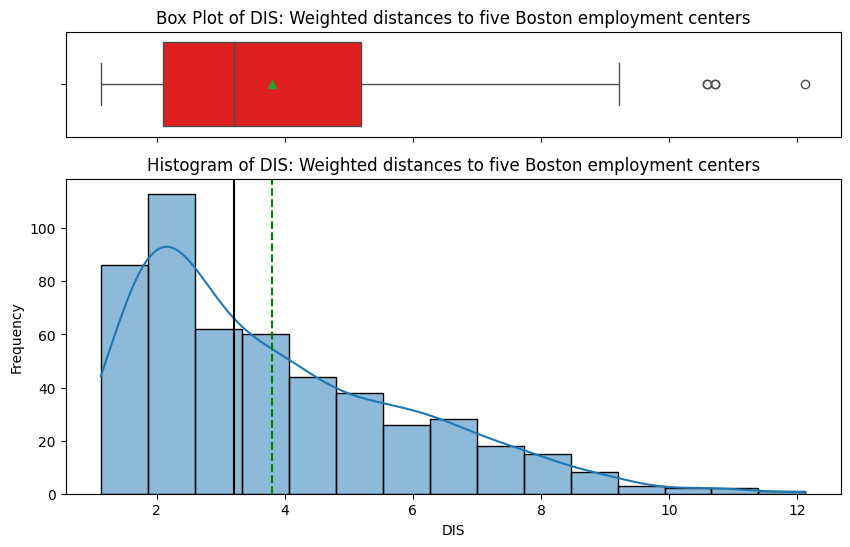

In [30]:
histogram_boxplot(df.DIS, 'DIS: Weighted distances to five Boston employment centers')


The plot confirms the right skew. most towns are relatively close to employment centers, and a few outliers are farther away.


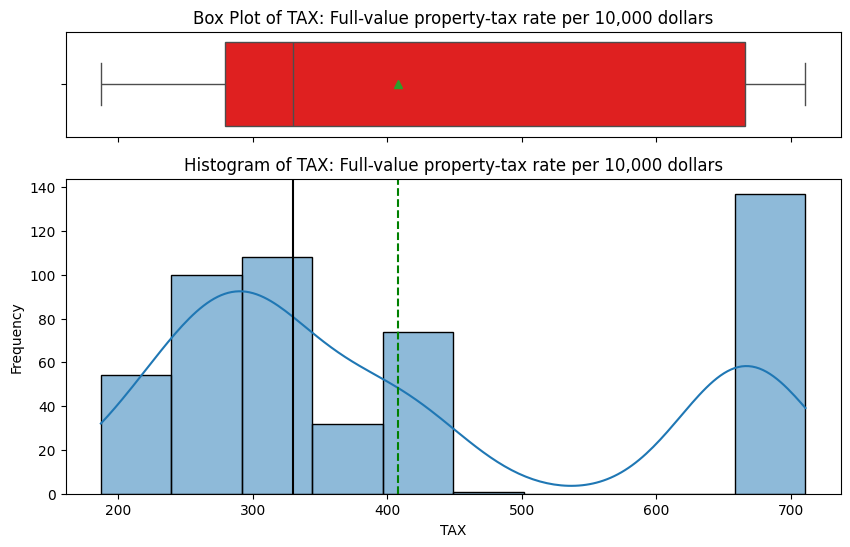

In [31]:
histogram_boxplot(df.TAX, 'TAX: Full-value property-tax rate per 10,000 dollars')


it is clear that there are 2 distict peaks, one around \$279-\$300 (2.79% to 3%) and a 2nd peak at $666 (~ 6.7%)

it means that public service funding is not equallly distributed.




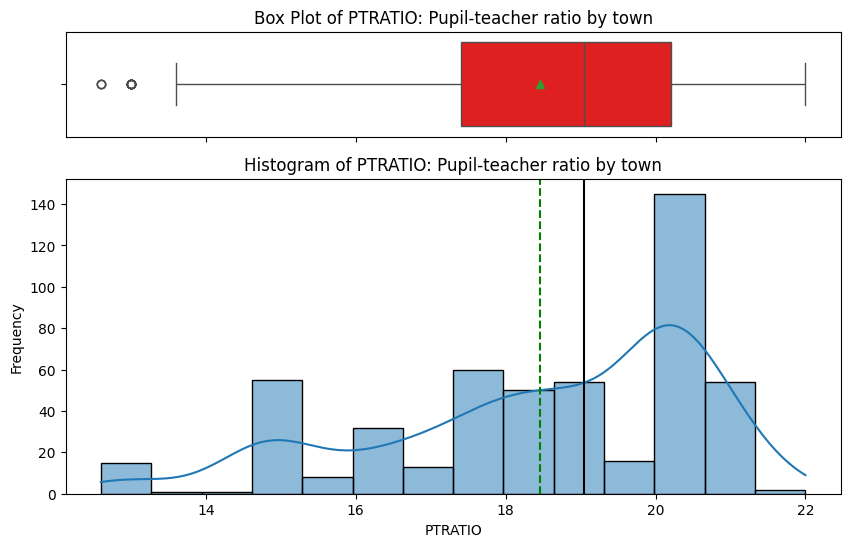

In [32]:
histogram_boxplot(df.PTRATIO, 'PTRATIO: Pupil-teacher ratio by town')


the mean of 18.46 < median 19.05 indicating right skew confirmed in the boxplot. the iqr spans from (Q1) 17.4 to 20.2 (Q3). ratios near 20 are the majority indicating some form of policy or standard.



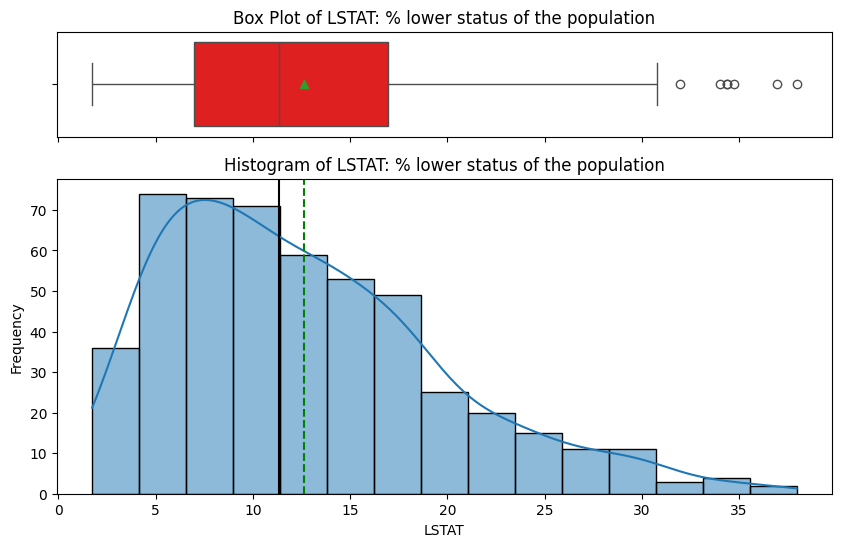

In [33]:
histogram_boxplot(df.LSTAT, 'LSTAT: % lower status of the population')


LSTAT shows a wide range between 1.73% and 37.97% and a mean of 12.65% with standard deviation of 7.14%. 25% of towns have a percentage of lower-status populations below 6.95% while 75% have a percentage less than 16.95%, meaning 25% of towns have percentages > 16.95% going towards 37.97% in a long tail which indicates concentration of socioeconomic disparities.

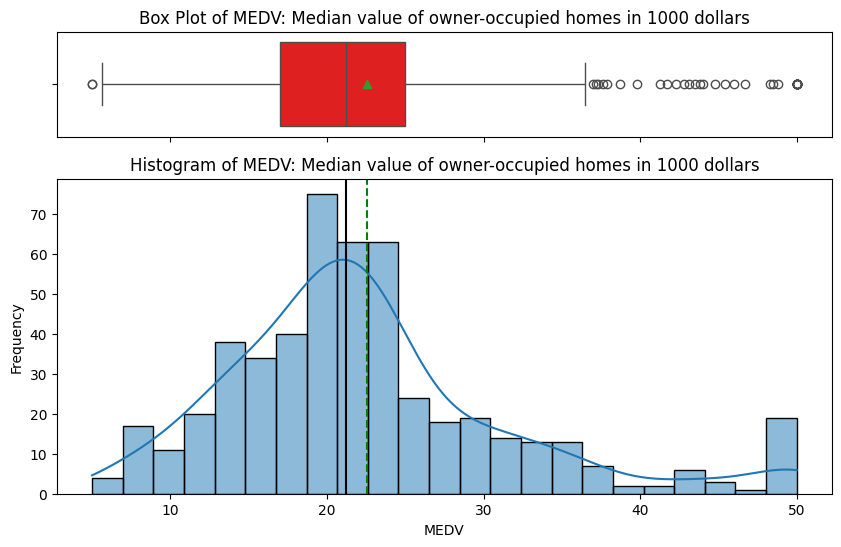

In [34]:
histogram_boxplot(df.MEDV, 'MEDV: Median value of owner-occupied homes in 1000 dollars')

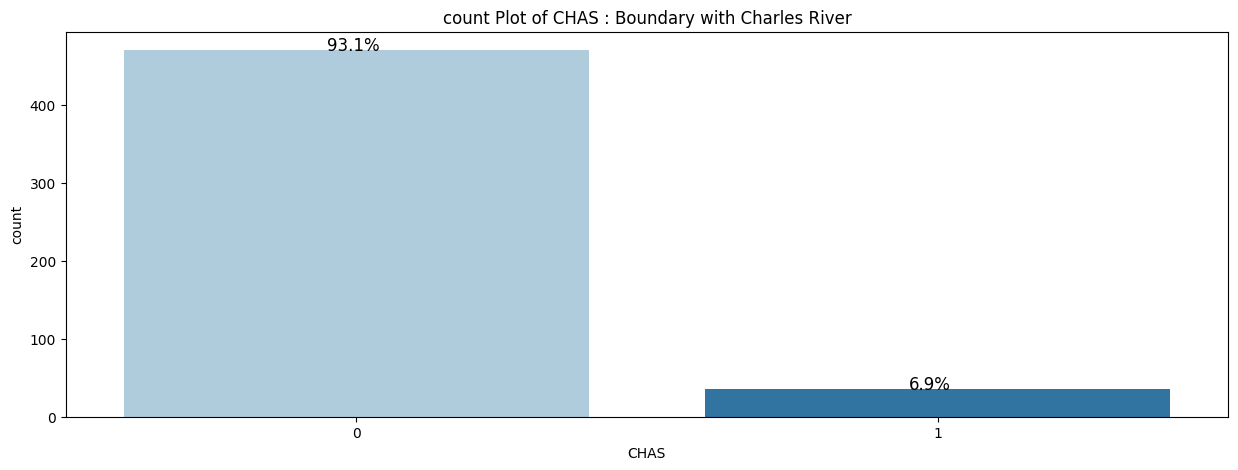

In [21]:
bar_perc(df, 'CHAS', 'CHAS : Boundary with Charles River')

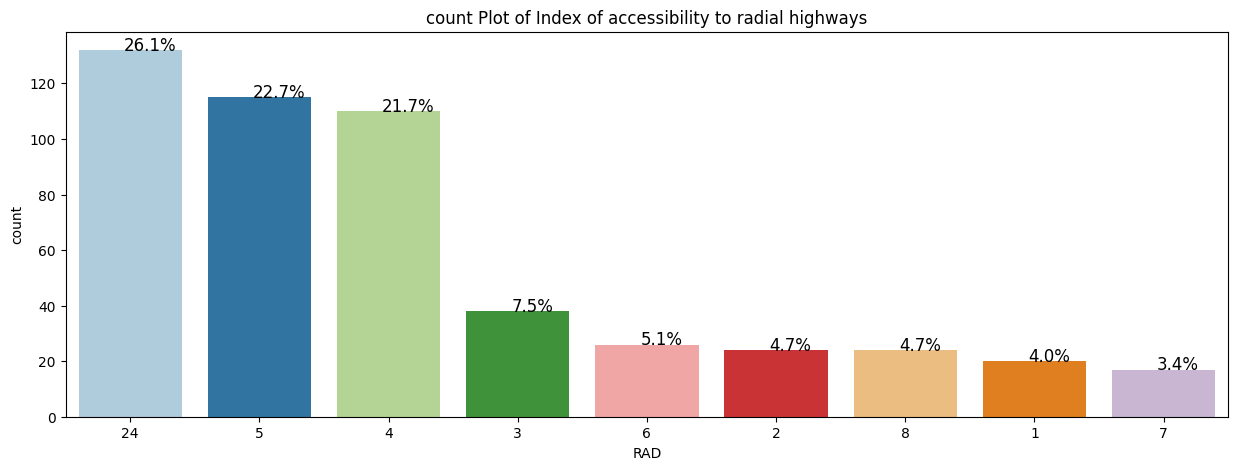

In [22]:
bar_perc(df, 'RAD', 'Index of accessibility to radial highways')

## Data Preprocessing

- Missing value treatment
- Log transformation of dependent variable if skewed
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

## Model Building - Linear Regression

## Model Performance Check

1. How does the model is performing? Check using Rsquared, RSME, MAE, MAPE
2. Is there multicollinearity? Check using VIF
3. How does the model is performing after cross validation?

## Checking Linear Regression Assumptions

- In order to make statistical inferences from a linear regression model, it is important to ensure that the assumptions of linear regression are satisfied.

## Final Model

## Actionable Insights and Recommendations

-


___